In [2]:
import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None 

df = pd.read_csv("problems.csv", delimiter=";")

<BarContainer object of 12 artists>

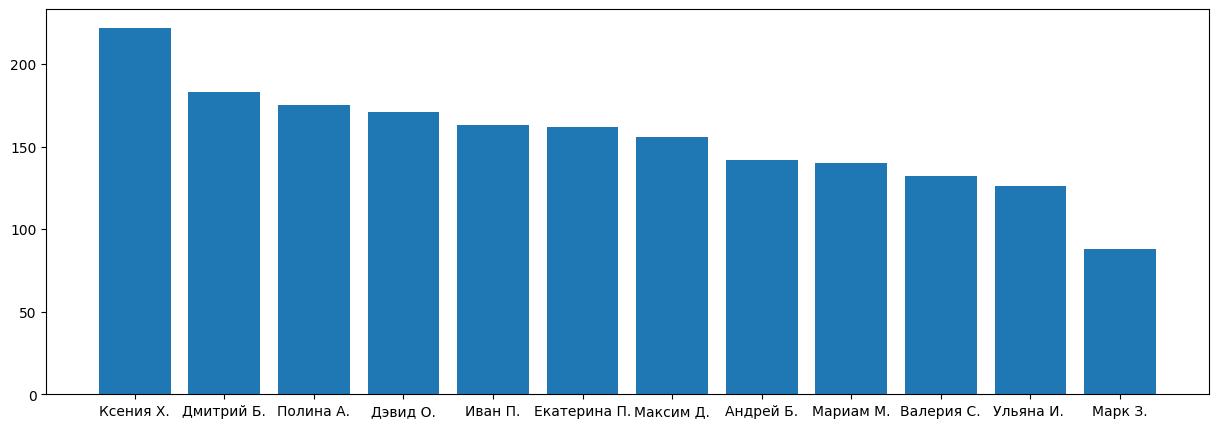

In [3]:
total = an.total_problems(df)
total.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(total.sort_values(ascending=False).index.tolist(), total.sort_values(ascending=False))

<BarContainer object of 12 artists>

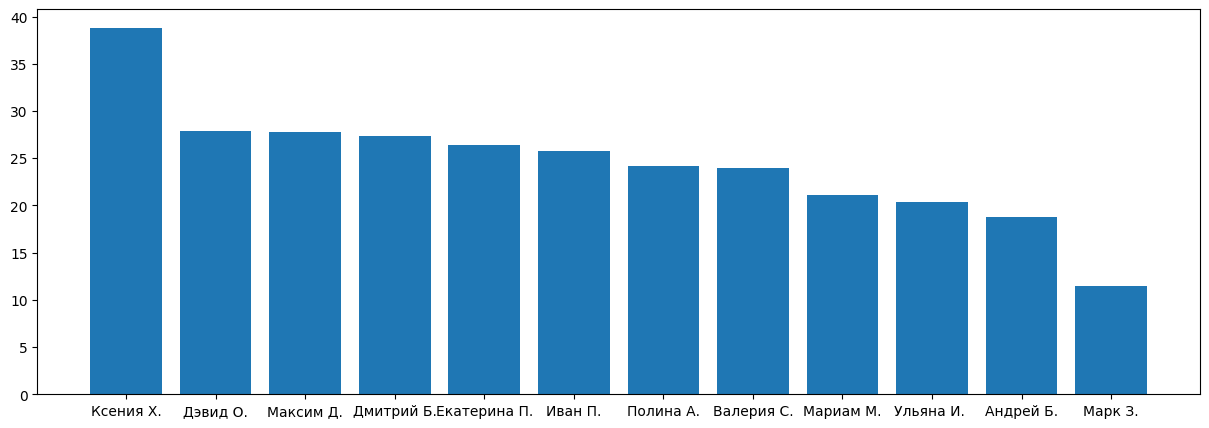

In [4]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.bar(points_c.sort_values(ascending=False).index.tolist(), points_c.sort_values(ascending=False))


<BarContainer object of 12 artists>

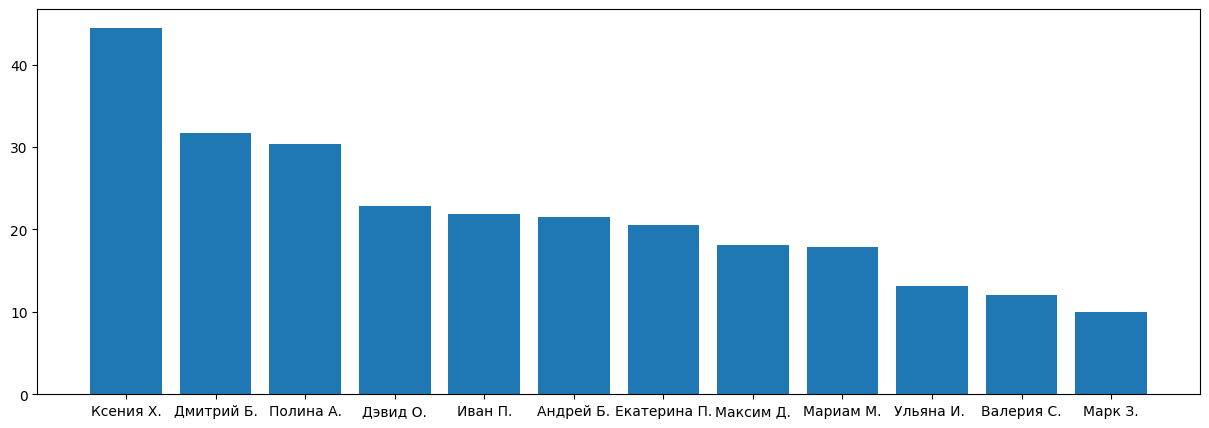

In [5]:
plt.figure(figsize=(15, 5))
plt.bar(points_t.sort_values(ascending=False).index.tolist(), points_t.sort_values(ascending=False))

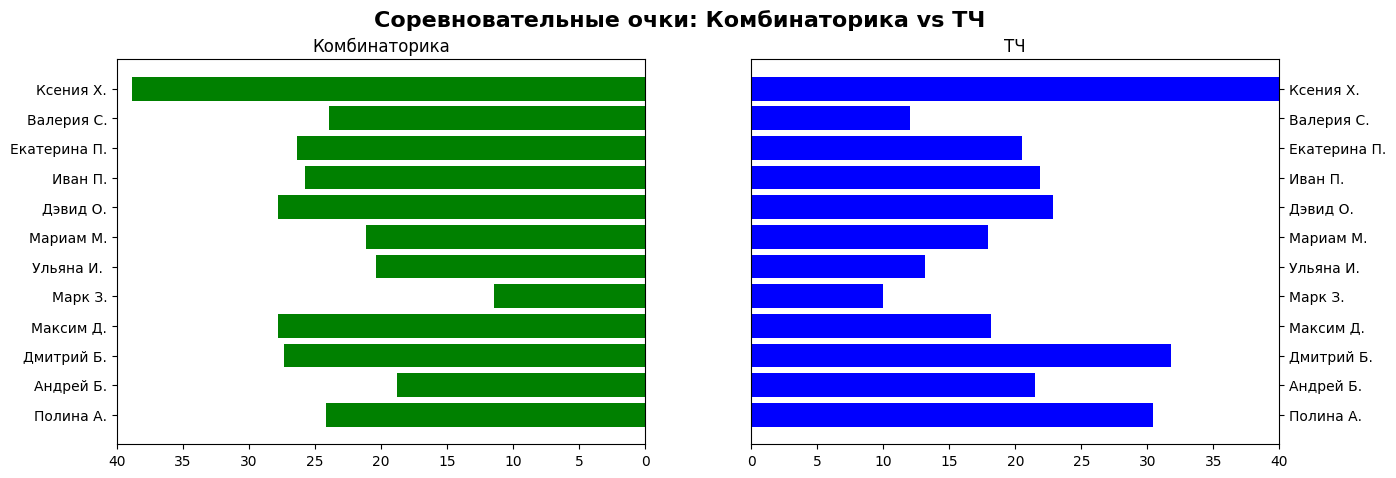

In [6]:
plt.figure(figsize=(15, 5))

plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([40, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 40])



plt.show()

<BarContainer object of 12 artists>

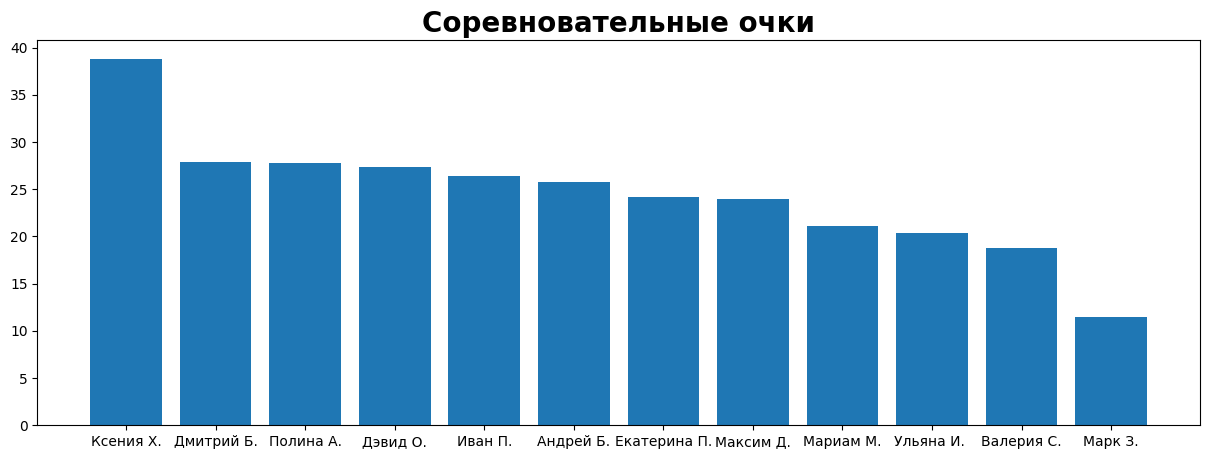

In [7]:
plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size = 20)
plt.bar(points_t.sort_values(ascending=False).index.tolist(), points_c.sort_values(ascending=False))

In [8]:
points = an.work_points(df, weight_func="linear")
points.sort_values(ascending=False)

Ксения Х.       1858.0
Дмитрий Б.      1738.0
Дэвид О.        1712.0
Полина А.       1692.0
Екатерина П.    1656.0
Иван П.         1655.0
Максим Д.       1565.0
Мариам М.       1492.0
Андрей Б.       1488.0
Валерия С.      1406.0
Ульяна И.       1375.0
Марк З.          993.0
dtype: float64

In [9]:
plt.figure(figsize=(15, 5))
comp_points = an.competative_points(df, topic="all", weight_func='')
plt.bar(comp_points.sort_values(ascending=False).index.tolist(), comp_points.sort_values(ascending=False))

KeyError: 'Comp_Weights'

<Figure size 1500x500 with 0 Axes>

In [ ]:
df1 = df.drop(columns=["Тема", "Подтема", "Процент номера", "Процент порядка"])
days_lst = []
for i in range(1, 9):
    days_lst.append((df==i).sum())
df2 = pd.DataFrame(days_lst, columns=df1.columns)

sns.lineplot(df2)

KeyError: "['Процент номера', 'Процент порядка'] not found in axis"

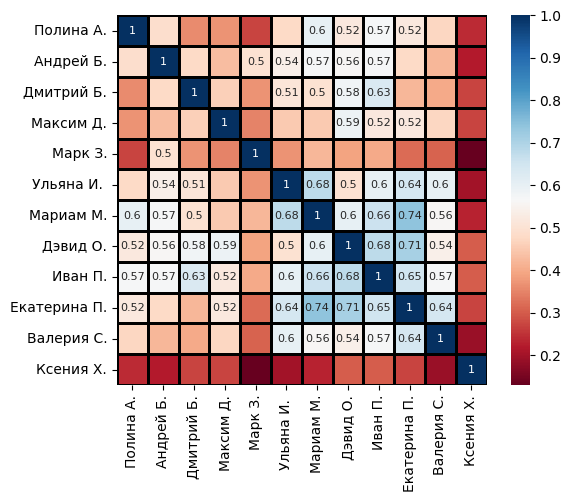

In [ ]:
df1 = an.bin_conduit(an.topic_loc(df))
colormap = plt.cm.RdBu
ax = sns.heatmap(
    np.round(df1.corr(numeric_only=True), 2),
    linewidths=0.8,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="black",
    annot=True,
    annot_kws={"fontsize":8},
)

for i in ax.texts:
    if abs(float(i.get_text())) < 0.5:
        i.set_text("")

plt.show()


In [10]:
stats = pd.DataFrame(data={ "Решенные задачи" : an.total_problems(df),
                            "Соревновательные очки" : an.competative_points(df, weight_func = "sqrt").to_numpy(),
                            "Рабочие очки" : an.competative_points(df, weight_func = "linear").to_numpy(),
                            "Количество задач по комбинаторике" : an.total_problems(df, topic='Комбинаторика'),
                            "Соревновательные очки в комбинаторике" : an.competative_points(df, topic='Комбинаторика', weight_func="sqrt"),
                            "Рабочие очки в комбинаторике" : an.work_points(df, topic='Комбинаторика', weight_func="linear"),
                            "Количество задач по ТЧ" : an.total_problems(df, topic='ТЧ'),
                            "Соревновательные очки в ТЧ" : an.competative_points(df, topic='ТЧ', weight_func="sqrt"),
                            "Рабочие очки в ТЧ" : an.work_points(df, topic='ТЧ', weight_func="linear"),
                            "Количество задач по графам" : an.total_problems(df, topic='Графы'),
                            "Соревновательные очки в графах" : an.competative_points(df, topic='Графы', weight_func="sqrt"),
                            "Рабочие очки в графах" : an.work_points(df, topic='Графы', weight_func="linear"),
                            "Стартовые соревновательные начальные очки" : an.competative_points(df, days=[1,2], weight_func='sqrt'),
                            "Стартовые рабочие начальные очки" : an.work_points(df, days=[1,2], weight_func='sqrt')}).reset_index(names=["Имя"])
stats

,Имя,Решенные задачи,Соревновательные очки,Рабочие очки,Количество задач по комбинаторике,Соревновательные очки в комбинаторике,Рабочие очки в комбинаторике,Количество задач по ТЧ,Соревновательные очки в ТЧ,Рабочие очки в ТЧ,Количество задач по графам,Соревновательные очки в графах,Рабочие очки в графах,Стартовые соревновательные начальные очки,Стартовые рабочие начальные очки
0,Полина А.,175.0,60.204731,408.0,77.0,24.161720,807.0,80.0,30.389919,682.0,18.0,5.653093,203.0,32.597195,205.250757
1,Андрей Б.,142.0,44.917353,216.0,62.0,18.802375,685.0,64.0,21.470504,613.0,16.0,4.644475,190.0,33.241858,234.683503
2,Дмитрий Б.,183.0,64.075466,458.0,84.0,27.372847,846.0,82.0,31.756632,691.0,17.0,4.945986,201.0,42.108823,271.811184
3,Максим Д.,156.0,51.574612,307.0,82.0,27.793961,801.0,56.0,18.127558,561.0,18.0,5.653093,203.0,18.763674,160.470067
4,Марк З.,88.0,26.428834,63.0,39.0,11.496007,454.0,32.0,9.986842,338.0,17.0,4.945986,201.0,19.600700,164.928124
5,Ульяна И.,126.0,38.485623,137.0,67.0,20.393050,733.0,42.0,13.146587,441.0,17.0,4.945986,201.0,5.452096,53.541558
6,Мариам М.,140.0,43.404048,188.0,69.0,21.136208,749.0,56.0,17.924877,564.0,15.0,4.342963,179.0,20.799540,175.798523
7,Дэвид О.,171.0,55.619600,340.0,85.0,27.835791,850.0,69.0,22.837824,661.0,17.0,4.945986,201.0,38.457986,246.774408
8,Иван П.,163.0,52.537754,301.0,81.0,25.744560,837.0,65.0,21.847208,617.0,17.0,4.945986,201.0,47.700931,285.475859
9,Екатерина П.,162.0,51.863193,288.0,82.0,26.371208,837.0,63.0,20.545999,618.0,17.0,4.945986,201.0,26.971584,215.139920
